<a href="https://colab.research.google.com/github/Vishwesh2024/TSF-GRIP/blob/master/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISHWESH RAJENDRA JAGTAP**

TASK 2 : PREDICTION USING UNSUPERVISED ML

KMeans Clustering

IRIS DATASET

Importing the required libraries

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

Reading the dataset i.e .csv file and coverting data intp pandas DataFrame.

In [47]:
data = pd.read_csv("Iris.csv")

Replacing the species name with a corresponding value. 

In [48]:
data.replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica'],value=[0,1,2],inplace=True)

In [49]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


The columns SepalLengthCm , SepalWidthCm , PetalLengthCm , PetalWidthCm are the features and Species is our target value.

Now to get the optimum number of clusters , we are running a for loop for number of clusters ranging from 1 to 11 and are appending inertia for each number of clusters.

In [28]:
from sklearn.cluster import KMeans
X = data.iloc[:,[1,2,3,4]].values

wcss = []

for i in range(1,11):
  kmean = KMeans(n_clusters = i ,init = 'k-means++' ,n_init=10 ,max_iter = 300,random_state=42)
  kmean.fit(X)
  wcss.append(kmean.inertia_)

wcss


[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.318753220611924,
 29.954086421037225,
 27.992635739389613,
 25.94725937001595]

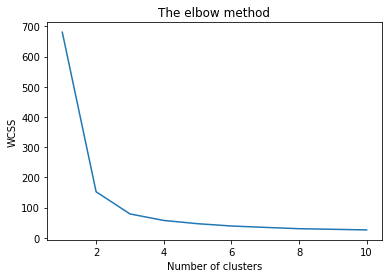

<function matplotlib.pyplot.show>

In [29]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
plt.show

Using the elbow method we observe , the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

Creating the KMeans classifier.

In [39]:
kmean_estimator = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)

And training the classifier on the dataset.

In [40]:
kmean_estimator.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [41]:
kmean_estimator.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Predicting the clusters now.

In [42]:
y_predict = kmean_estimator.fit_predict(X)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [43]:
kmean_estimator.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Centroids of each Cluster

Visualising the clusters - On the first two columns

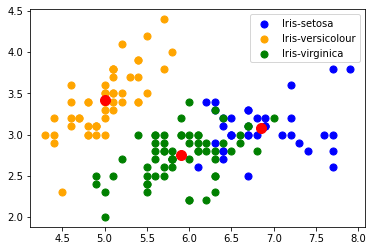

In [44]:
plt.scatter(X[y_predict == 0,0],X[y_predict == 0,1],s=50,color='blue',label = 'Iris-setosa')
plt.scatter(X[y_predict == 1,0],X[y_predict == 1,1],s=50,color='orange',label = 'Iris-versicolour')
plt.scatter(X[y_predict == 2,0],X[y_predict == 2,1],s=50,color='green',label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean_estimator.cluster_centers_[:,0],kmean_estimator.cluster_centers_[:,1],color='red',s=100)

plt.show
plt.legend()

 Visualising the clusters - On the next two columns

<function matplotlib.pyplot.show>

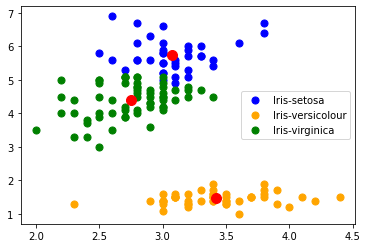

In [50]:
plt.scatter(X[y_predict == 0,1],X[y_predict == 0,2],s=50,color='blue',label = 'Iris-setosa')
plt.scatter(X[y_predict == 1,1],X[y_predict == 1,2],s=50,color='orange',label = 'Iris-versicolour')
plt.scatter(X[y_predict == 2,1],X[y_predict == 2,2],s=50,color='green',label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean_estimator.cluster_centers_[:,1],kmean_estimator.cluster_centers_[:,2],color='red',s=100)


plt.legend()
plt.show